<a href="https://colab.research.google.com/github/Abdul-AI-creator/Abdul-AI-creator/blob/main/Density_Estimation_for_a_Gaussian_mixture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture
import matplotlib as mpl
from matplotlib.colors import LogNorm

# **covariance_type='full'**

In [35]:
n_samples = 300
# Generate random samples, two components
np.random.seed(0)

## **generate spherical data**

In [36]:
# generate spherical data centered on (20,20)
shifted_gaussian = np.random.randn(n_samples,2)+ np.array([20,20])
shifted_gaussian

array([[21.76405235, 20.40015721],
       [20.97873798, 22.2408932 ],
       [21.86755799, 19.02272212],
       [20.95008842, 19.84864279],
       [19.89678115, 20.4105985 ],
       [20.14404357, 21.45427351],
       [20.76103773, 20.12167502],
       [20.44386323, 20.33367433],
       [21.49407907, 19.79484174],
       [20.3130677 , 19.14590426],
       [17.44701018, 20.6536186 ],
       [20.8644362 , 19.25783498],
       [22.26975462, 18.54563433],
       [20.04575852, 19.81281615],
       [21.53277921, 21.46935877],
       [20.15494743, 20.37816252],
       [19.11221425, 18.01920353],
       [19.65208785, 20.15634897],
       [21.23029068, 21.20237985],
       [19.61267318, 19.69769725],
       [18.95144703, 18.57998206],
       [18.29372981, 21.9507754 ],
       [19.49034782, 19.5619257 ],
       [18.74720464, 20.77749036],
       [18.38610215, 19.78725972],
       [19.10453344, 20.3869025 ],
       [19.48919486, 18.81936782],
       [19.97181777, 20.42833187],
       [20.06651722,

In [37]:
# generate zero centre stretched Gaussian data
c=np.array([[0.0,-0.7],[3.5,0.7]])
stretched_gaussian = np.dot(np.random.randn(n_samples,2),c)
stretched_gaussian

array([[ 1.46061587e+00,  1.37742372e+00],
       [ 8.33361017e-01,  8.27730147e-01],
       [-2.06520176e+00,  5.71133689e-01],
       [-5.81244934e+00, -1.08514728e+00],
       [-1.32701647e+00, -3.46006805e-01],
       [-4.56134964e+00,  3.07379411e-01],
       [ 3.13444595e+00,  2.03305131e-01],
       [ 1.41666634e+00,  3.75669316e-01],
       [ 1.15368044e+00,  7.40455932e-02],
       [-5.27449439e+00, -1.95508768e+00],
       [-1.33703134e+00, -7.40928782e-01],
       [-1.05787406e+00, -5.45935573e-02],
       [-4.29168667e+00, -5.95734353e-01],
       [ 5.84830061e+00,  1.04132268e+00],
       [-4.84764957e-03,  3.83235844e-02],
       [-4.11160912e-01,  3.98877144e-01],
       [-1.29584854e+00, -5.85486207e-01],
       [ 1.41142589e+00,  5.99948007e-01],
       [ 8.83738195e-01,  8.19350978e-01],
       [ 4.75981990e+00,  3.77738721e-01],
       [ 4.78659034e+00,  1.02058547e+00],
       [-3.48674424e+00, -1.42143577e+00],
       [-1.06737273e+00,  6.39082412e-01],
       [-2.

In [39]:
# concatenate two datasets into final train dataset
x_train = np.vstack([shifted_gaussian,stretched_gaussian])
x_train

array([[21.76405235, 20.40015721],
       [20.97873798, 22.2408932 ],
       [21.86755799, 19.02272212],
       ...,
       [ 3.63154983, -0.24845295],
       [-2.07822107, -0.42879847],
       [ 2.06396262,  1.82110875]])

In [40]:
#fit gaussian mixture model to 2 -components
clf = mixture.GaussianMixture(n_components= 2, covariance_type='full')
clf.fit(x_train)


GaussianMixture(n_components=2)

In [48]:
#dispaly predicted score as contour plot
x= np.linspace(-20,30)
y= np.linspace(-20,40)
x

array([-20.        , -18.97959184, -17.95918367, -16.93877551,
       -15.91836735, -14.89795918, -13.87755102, -12.85714286,
       -11.83673469, -10.81632653,  -9.79591837,  -8.7755102 ,
        -7.75510204,  -6.73469388,  -5.71428571,  -4.69387755,
        -3.67346939,  -2.65306122,  -1.63265306,  -0.6122449 ,
         0.40816327,   1.42857143,   2.44897959,   3.46938776,
         4.48979592,   5.51020408,   6.53061224,   7.55102041,
         8.57142857,   9.59183673,  10.6122449 ,  11.63265306,
        12.65306122,  13.67346939,  14.69387755,  15.71428571,
        16.73469388,  17.75510204,  18.7755102 ,  19.79591837,
        20.81632653,  21.83673469,  22.85714286,  23.87755102,
        24.89795918,  25.91836735,  26.93877551,  27.95918367,
        28.97959184,  30.        ])

In [49]:
y

array([-20.        , -18.7755102 , -17.55102041, -16.32653061,
       -15.10204082, -13.87755102, -12.65306122, -11.42857143,
       -10.20408163,  -8.97959184,  -7.75510204,  -6.53061224,
        -5.30612245,  -4.08163265,  -2.85714286,  -1.63265306,
        -0.40816327,   0.81632653,   2.04081633,   3.26530612,
         4.48979592,   5.71428571,   6.93877551,   8.16326531,
         9.3877551 ,  10.6122449 ,  11.83673469,  13.06122449,
        14.28571429,  15.51020408,  16.73469388,  17.95918367,
        19.18367347,  20.40816327,  21.63265306,  22.85714286,
        24.08163265,  25.30612245,  26.53061224,  27.75510204,
        28.97959184,  30.20408163,  31.42857143,  32.65306122,
        33.87755102,  35.10204082,  36.32653061,  37.55102041,
        38.7755102 ,  40.        ])

In [50]:
X,Y = np.meshgrid(x,y)
X

array([[-20.        , -18.97959184, -17.95918367, ...,  27.95918367,
         28.97959184,  30.        ],
       [-20.        , -18.97959184, -17.95918367, ...,  27.95918367,
         28.97959184,  30.        ],
       [-20.        , -18.97959184, -17.95918367, ...,  27.95918367,
         28.97959184,  30.        ],
       ...,
       [-20.        , -18.97959184, -17.95918367, ...,  27.95918367,
         28.97959184,  30.        ],
       [-20.        , -18.97959184, -17.95918367, ...,  27.95918367,
         28.97959184,  30.        ],
       [-20.        , -18.97959184, -17.95918367, ...,  27.95918367,
         28.97959184,  30.        ]])

In [51]:
Y

array([[-20.        , -20.        , -20.        , ..., -20.        ,
        -20.        , -20.        ],
       [-18.7755102 , -18.7755102 , -18.7755102 , ..., -18.7755102 ,
        -18.7755102 , -18.7755102 ],
       [-17.55102041, -17.55102041, -17.55102041, ..., -17.55102041,
        -17.55102041, -17.55102041],
       ...,
       [ 37.55102041,  37.55102041,  37.55102041, ...,  37.55102041,
         37.55102041,  37.55102041],
       [ 38.7755102 ,  38.7755102 ,  38.7755102 , ...,  38.7755102 ,
         38.7755102 ,  38.7755102 ],
       [ 40.        ,  40.        ,  40.        , ...,  40.        ,
         40.        ,  40.        ]])

In [52]:
XX = np.array([X.ravel(), Y.ravel()]).T # ravel() converts muti-dimension array to 1-d array
XX

array([[-20.        , -20.        ],
       [-18.97959184, -20.        ],
       [-17.95918367, -20.        ],
       ...,
       [ 27.95918367,  40.        ],
       [ 28.97959184,  40.        ],
       [ 30.        ,  40.        ]])

In [53]:
Z = -clf.score_samples(XX)
Z= Z.reshape(X.shape)
Z

array([[317.76727123, 323.60323478, 329.6265421 , ..., 794.5761726 ,
        809.2172933 , 824.04575778],
       [274.00241907, 279.26149443, 284.70791356, ..., 723.69757553,
        737.76180805, 752.01338434],
       [233.72362481, 238.40581197, 243.27534291, ..., 656.30503636,
        669.79238069, 683.46706879],
       ...,
       [940.36141579, 900.95216904, 862.56195171, ..., 189.69762219,
        198.18275821, 207.68692365],
       [963.0072365 , 923.59393791, 885.19966875, ..., 212.15300651,
        220.63409069, 230.13420429],
       [987.16702   , 947.74966957, 909.35134857, ..., 236.12235361,
        244.59938595, 254.09544771]])

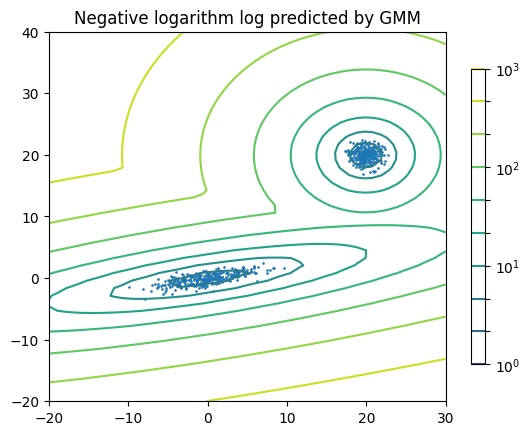

In [54]:
# vmin,vmax = define the data range that the colormap covers
cs = plt.contour(X,Y,Z,norm = LogNorm(vmin=0.1,vmax =1000.0),levels =np.logspace(0,3,10))
cb= plt.colorbar(cs,shrink=0.8,extend='both')

plt.scatter(x_train[:, 0],x_train[:, 1],0.8)
plt.title('Negative logarithm log predicted by GMM')
plt.axis('tight')
plt.show()

# **All code in one cell**

# **covariance_type="spherical"**

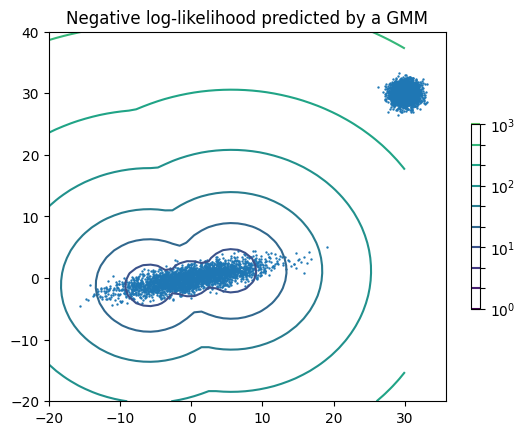

In [66]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

from sklearn import mixture

n_samples = 3000

# generate random sample, two components
np.random.seed(0)

# generate spherical data centered on (20, 20)
shifted_gaussian = np.random.randn(n_samples, 4) + np.array([30, 30,30,30])

# generate zero centered stretched Gaussian data
C = np.array([[0.0, -0.7,0,0.1], [3.5, 0.7,0,0.1],[0.0, -0.7,0,0.1], [3.5, 0.7,0,0.1]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 4), C)

# concatenate the two datasets into the final training set
X_train = np.vstack([shifted_gaussian, stretched_gaussian])

# fit a Gaussian Mixture Model with two components
clf = mixture.GaussianMixture(n_components=4, covariance_type="spherical")
clf.fit(X_train)

# display predicted scores by the model as a contour plot
x = np.linspace(-20.0, 30.0)
y = np.linspace(-20.0, 40.0)
X, Y = np.meshgrid(x, y)

XX = np.array([X.ravel(), Y.ravel()]).T
# Add two additional dimensions (e.g., zeros) to XX to match the GMM input dimensionality
XX=np.hstack([XX,np.zeros((XX.shape[0],2))])
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(
    X, Y, Z, norm=LogNorm(vmin=1.0, vmax=10000.0), levels=np.logspace(0, 3, 10)
)
CB = plt.colorbar(CS, shrink=0.5, extend="both")
plt.scatter(X_train[:, 0], X_train[:, 1], 0.5)

plt.title("Negative log-likelihood predicted by a GMM")
plt.axis("tight")
plt.show()

**covariance_type**="diag"

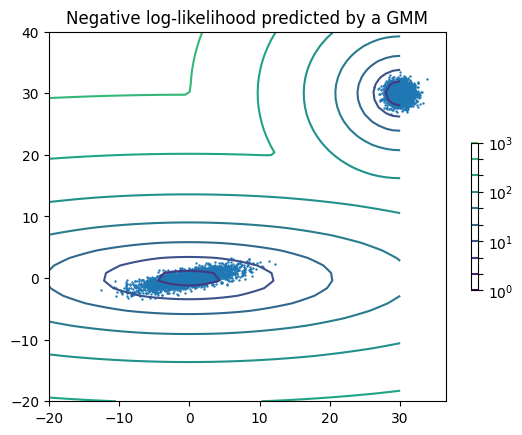

In [71]:

import numpy as np
from matplotlib.colors import LogNorm

from sklearn import mixture

n_samples = 3000

# generate random sample, two components
np.random.seed(0)

# generate spherical data centered on (20, 20)
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([30, 30])

# generate zero centered stretched Gaussian data
C = np.array([[0.0, -0.7], [3.5, 0.7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)

# concatenate the two datasets into the final training set
X_train = np.vstack([shifted_gaussian, stretched_gaussian])

# fit a Gaussian Mixture Model with two components
clf = mixture.GaussianMixture(n_components=2, covariance_type="diag")
clf.fit(X_train)

# display predicted scores by the model as a contour plot
x = np.linspace(-20.0, 30.0)
y = np.linspace(-20.0, 40.0)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(
    X, Y, Z, norm=LogNorm(vmin=1.0, vmax=10000.0), levels=np.logspace(0, 3, 10)
)
CB = plt.colorbar(CS, shrink=0.4, extend="both")
plt.scatter(X_train[:, 0], X_train[:, 1], 0.5)

plt.title("Negative log-likelihood predicted by a GMM")
plt.axis("tight")
plt.show()
CB